In [1]:
import pandas as pd
import numpy as np

In [52]:
df = pd.read_csv('C:\\DS Competitions\\Kaggle\\creditcard.csv\\creditcard.csv')

In [53]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [54]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [55]:
X = df.drop('Class',axis=1)
y=df['Class']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101)

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf = RandomForestClassifier()

In [59]:
rf.fit(X_train,y_train)

C:\Users\Sheik\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
pred_rf = rf.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [62]:
print(accuracy_score(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

0.9995259997893332
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.95      0.78      0.86       103

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [63]:
from imblearn.over_sampling import SMOTE

In [64]:
sm =SMOTE()

In [65]:
X_train_sm,y_train_sm = sm.fit_sample(X_train,y_train)

In [66]:
X_train.shape, X_train_sm.shape

((227845, 30), (454912, 30))

In [67]:
rf.fit(X_train_sm,y_train_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
pred_sm = rf.predict(X_test)

In [69]:
print(accuracy_score(y_test,pred_sm))
print(classification_report(y_test,pred_sm))

0.9995435553526912
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.90      0.84      0.87       103

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



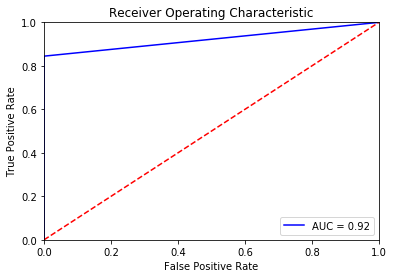

In [76]:
from sklearn.metrics import auc,roc_curve
fpr, tpr, threshold = roc_curve(y_test, pred_sm)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()